In [56]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

In [2]:
data = scipy.io.readsav('/data1/work/leuven_2024/kink_waves/trace_struct_cr2223_demt_awsomfield_6alt_1.025-1.225rsun_FULL.sav')

In [3]:
asd=data['datos']

In [4]:
asd.dtype.fields.items()

dict_items([('NEMEAN', (dtype('O'), 0, 'nemean')), ('nemean', (dtype('O'), 0, 'nemean')), ('TMMEAN', (dtype('O'), 8, 'tmmean')), ('tmmean', (dtype('O'), 8, 'tmmean')), ('NESTDDEV', (dtype('O'), 16, 'nestddev')), ('nestddev', (dtype('O'), 16, 'nestddev')), ('TMSTDDEV', (dtype('O'), 24, 'tmstddev')), ('tmstddev', (dtype('O'), 24, 'tmstddev')), ('WTMEAN', (dtype('O'), 32, 'wtmean')), ('wtmean', (dtype('O'), 32, 'wtmean')), ('WTSTDDEV', (dtype('O'), 40, 'wtstddev')), ('wtstddev', (dtype('O'), 40, 'wtstddev')), ('PMEAN', (dtype('O'), 48, 'pmean')), ('pmean', (dtype('O'), 48, 'pmean')), ('NE2MEAN', (dtype('O'), 56, 'ne2mean')), ('ne2mean', (dtype('O'), 56, 'ne2mean')), ('ERMEAN', (dtype('O'), 64, 'ermean')), ('ermean', (dtype('O'), 64, 'ermean')), ('BMEAN', (dtype('O'), 72, 'bmean')), ('bmean', (dtype('O'), 72, 'bmean')), ('NE0', (dtype('O'), 80, 'ne0')), ('ne0', (dtype('O'), 80, 'ne0')), ('LAMBDA_N', (dtype('O'), 88, 'lambda_n')), ('lambda_n', (dtype('O'), 88, 'lambda_n')), ('R2N', (dtype('

In [154]:
#Create lists of all the variables in the sav file
lambda_n   = asd[0].lambda_n.tolist()
lambda_n_s = asd[0].lambda_n_s.tolist()
gradt      = asd[0].gradt.tolist()
gradt_s    = asd[0].gradt_s.tolist()
ne0        = asd[0].ne0.tolist()
ne0_s      = asd[0].ne0_s.tolist()
long_r     = asd[0].long_r.tolist()
long_s     = asd[0].long_s.tolist()
pearson_n  = asd[0].pearson_n.tolist()
nebasal    = asd[0].nebasal.tolist()
r2n        = asd[0].r2n.tolist()
pearson_t  = asd[0].pearson_t.tolist()
long_tot   = asd[0].long_tot.tolist()
opclstat   = asd[0].opclstat.tolist()
footlat    = asd[0].footlat.tolist()

In [155]:
#Create a list corresponding to zda, to be use in filters
zda=list(np.where(np.array(nebasal)>-500)[0])

In [156]:
#discard zda in each list of values
long_r_clean     = [long_r[qwe] for qwe in zda]
long_s_clean     = [long_s[qwe] for qwe in zda]
lambda_n_clean   = [lambda_n[qwe] for qwe in zda]
lambda_n_s_clean = [lambda_n_s[qwe] for qwe in zda]
r2n_clean        = [r2n[qwe] for qwe in zda]
pearson_n_clean  = [pearson_n[qwe] for qwe in zda]
gradt_clean      = [gradt[qwe] for qwe in zda]
pearson_t_clean  = [pearson_t[qwe] for qwe in zda]
long_tot_clean   = [long_tot[qwe] for qwe in zda]
opclstat_clean   = [opclstat[qwe] for qwe in zda]
footlat_clean    = [footlat[qwe] for qwe in zda]
lambda_n_s_clean = [lambda_n_s[qwe] for qwe in zda]
ne0_s_clean      = [ne0_s[qwe] for qwe in zda]


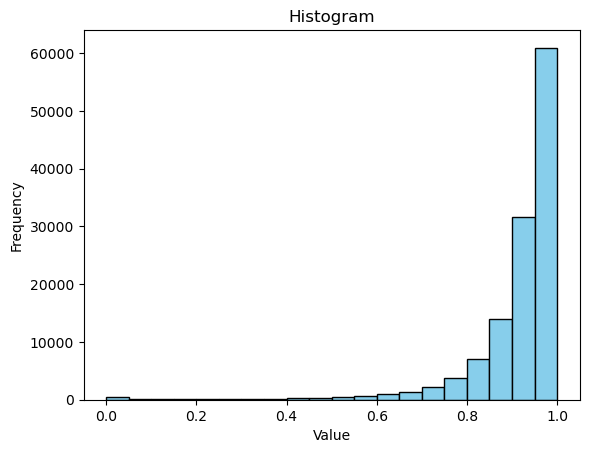

In [ ]:
#Histogram of Ne fit. R2N
min_value = 0
max_value = 1
constrained_data = np.clip(r2n_clean, min_value, max_value)
plt.hist(constrained_data, bins=20, color='skyblue', edgecolor='black')
#plt.xlim(-3, 3)
# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
# Show the plot
plt.show()


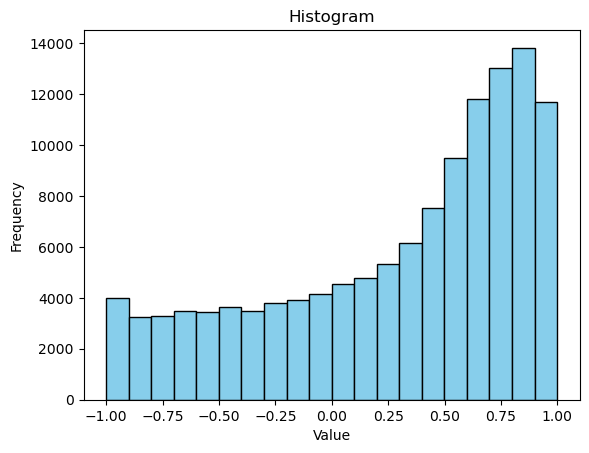

In [ ]:
#pearson T
min_value = -1
max_value = 1
constrained_data = np.clip(pearson_t_clean, min_value, max_value)
plt.hist(constrained_data, bins=20, color='skyblue', edgecolor='black')
#plt.xlim(-3, 3)
# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
# Show the plot
plt.show()

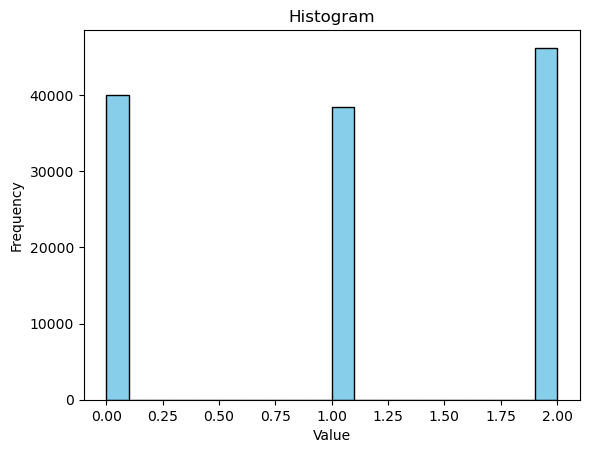

In [ ]:
#openclstat
min_value = -4
max_value = 4
constrained_data = np.clip(opclstat_clean, min_value, max_value)
plt.hist(constrained_data, bins=20, color='skyblue', edgecolor='black')
#plt.xlim(-3, 3)
# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
# Show the plot
plt.show()

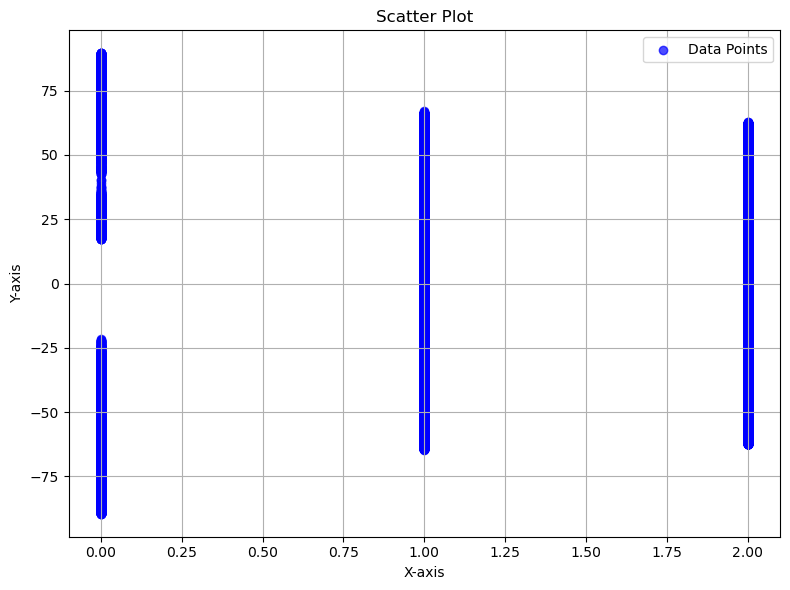

In [ ]:
#Latitude in each opclstat
plt.figure(figsize=(8,6))
plt.scatter(opclstat_clean, footlat_clean, marker='o', color='b', alpha=0.7, label='Data Points')  # Customize the plot
#plt.ylim(-1, 1)
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')
# Add a legend
plt.legend()
# Show the plot
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()  # Adjust spacing for labels
plt.show()

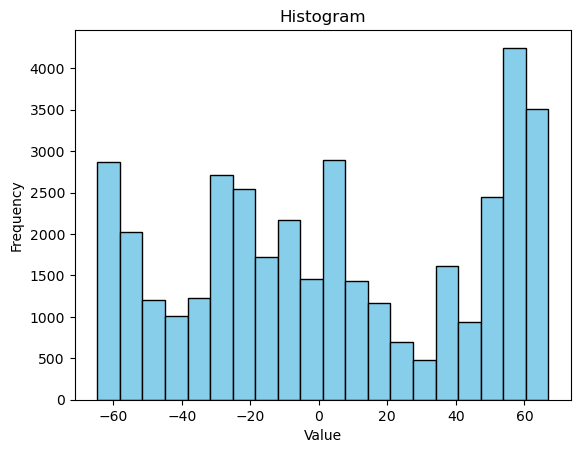

In [13]:
#2 es cerrado chico, 1 cerrado grande y 0 es abierto
filter_opclstat_clean=list(np.where(np.array(opclstat_clean)==1)[0])
footlat_clean_filtered   = [footlat_clean[qwe] for qwe in filter_opclstat_clean]
#constrained_data = np.clip(footlat_clean_filtered, min_value, max_value)
plt.hist(footlat_clean_filtered, bins=20, color='skyblue', edgecolor='black')
#plt.xlim(-3, 3)
# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
# Show the plot
plt.show()

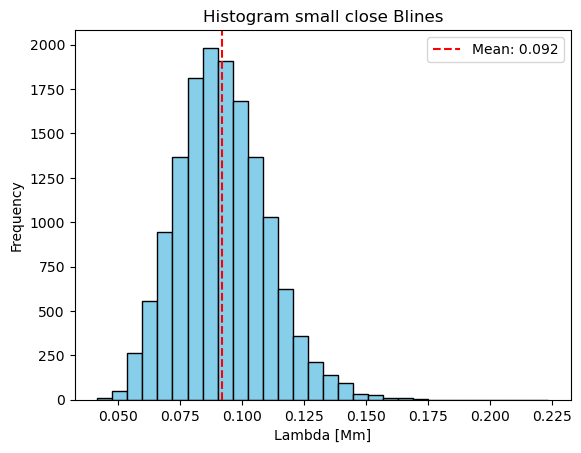

In [157]:
#small closed Blines - Lambda_n
#2 es cerrado chico, 1 cerrado grande y 0 es abierto
cond1 = np.array(opclstat_clean)==2
cond2 = np.array(pearson_t_clean)>0.5
cond3 = np.array(r2n_clean)>0.85
cond4 = np.array(np.abs(footlat_clean)) < 40
filter_multi_clean_2=list(np.where(cond1 & cond2 & cond3 & cond4)[0])
#footlat_clean_filtered   = [footlat_clean[qwe] for qwe in filter_multi_clean]
#plt.hist(footlat_clean_filtered, bins=20, color='skyblue', edgecolor='black')
#constrained_data = np.clip(footlat_clean_filtered, min_value, max_value)
lambda_clean_filtered_2   = [lambda_n_clean[qwe] for qwe in filter_multi_clean_2]
plt.hist(lambda_clean_filtered_2, bins=30, color='skyblue', edgecolor='black')
mean_value = np.mean(lambda_clean_filtered_2)
plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.3f}')
#plt.xlim(-3, 3)
# Add labels and title
plt.xlabel('Lambda [Mm]')
plt.ylabel('Frequency')
plt.title('Histogram small close Blines')
# Show the plot
plt.legend()
plt.show()

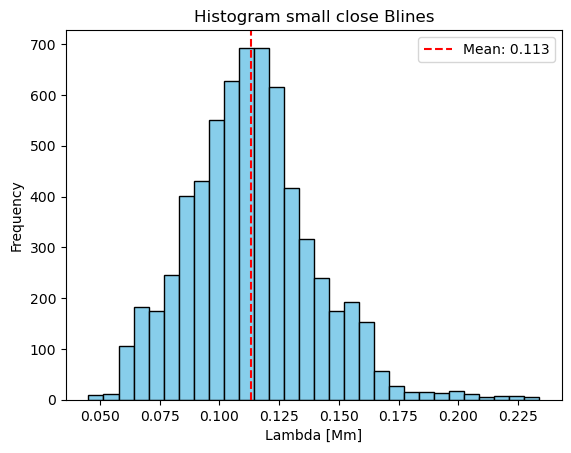

In [158]:
#Big closed Blines - Lambda_n
cond1 = np.array(opclstat_clean)==1
cond2 = np.array(pearson_t_clean)>0.5
cond3 = np.array(r2n_clean)>0.85
cond4 = np.array(np.abs(footlat_clean)) > 40
filter_multi_clean_1=list(np.where(cond1 & cond2 & cond3 & cond4)[0])
#footlat_clean_filtered   = [footlat_clean[qwe] for qwe in filter_multi_clean]
#plt.hist(footlat_clean_filtered, bins=20, color='skyblue', edgecolor='black')
#constrained_data = np.clip(footlat_clean_filtered, min_value, max_value)
lambda_clean_filtered_1   = [lambda_n_clean[qwe] for qwe in filter_multi_clean_1]
plt.hist(lambda_clean_filtered_1, bins=30, color='skyblue', edgecolor='black')
mean_value = np.mean(lambda_clean_filtered_1)
plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.3f}')
#plt.xlim(-3, 3)
# Add labels and title
plt.xlabel('Lambda [Mm]')
plt.ylabel('Frequency')
plt.title('Histogram small close Blines')
# Show the plot
plt.legend()
plt.show()

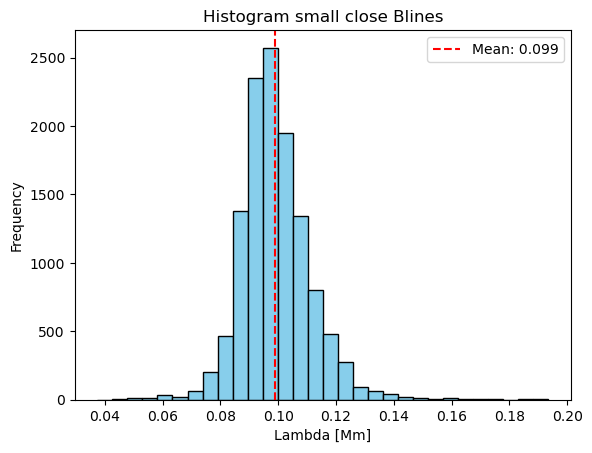

In [159]:
#Open Blines - Lambda_n
cond1 = np.array(opclstat_clean)==0
cond2 = np.array(pearson_t_clean)>0.5
cond3 = np.array(r2n_clean)>0.85
cond4 = np.array(np.abs(footlat_clean)) > 70
filter_multi_clean_0=list(np.where(cond1 & cond2 & cond3 & cond4)[0])
#footlat_clean_filtered   = [footlat_clean[qwe] for qwe in filter_multi_clean]
#plt.hist(footlat_clean_filtered, bins=20, color='skyblue', edgecolor='black')
#constrained_data = np.clip(footlat_clean_filtered, min_value, max_value)
lambda_clean_filtered_0   = [lambda_n_clean[qwe] for qwe in filter_multi_clean_0]
plt.hist(lambda_clean_filtered_0, bins=30, color='skyblue', edgecolor='black')
mean_value = np.mean(lambda_clean_filtered_0)
plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.3f}')
#plt.xlim(-3, 3)
# Add labels and title
plt.xlabel('Lambda [Mm]')
plt.ylabel('Frequency')
plt.title('Histogram small close Blines')
# Show the plot
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


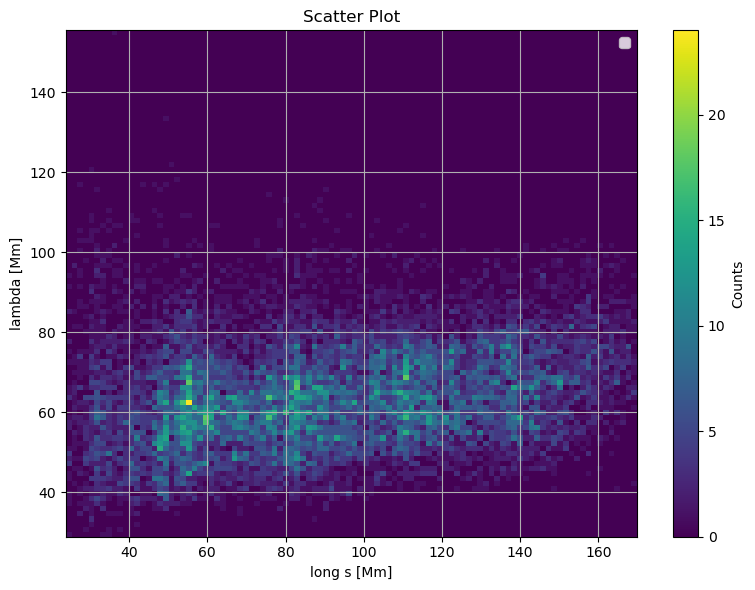

In [71]:

long_r_clean_filtered   = [long_r_clean[qwe] for qwe in filter_multi_clean_2]
long_s_clean_filtered   = [long_s_clean[qwe] for qwe in filter_multi_clean_2]
lambda_n_clean_filtered = [lambda_n_clean[qwe] for qwe in filter_multi_clean_2]
rsun_to_Mm = 695.7
long_s_clean_filtered = np.array(long_r_clean_filtered)*rsun_to_Mm
lambda_n_clean_filtered = np.array(lambda_n_clean_filtered)*rsun_to_Mm
#second filter
plt.figure(figsize=(8,6))
#plt.scatter(long_s_clean_filtered, lambda_n_clean_filtered, marker='o', color='b', alpha=0.7, label='Data Points')  # Customize the plot

plt.hist2d(long_s_clean_filtered, lambda_n_clean_filtered, bins=100)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')

#plt.ylim(-1, 1)
# Add labels and title
plt.xlabel('long s [Mm]')
plt.ylabel('lambda [Mm]')
plt.title('Scatter Plot')
# Add a legend
plt.legend()
# Show the plot
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()  # Adjust spacing for labels
plt.show()

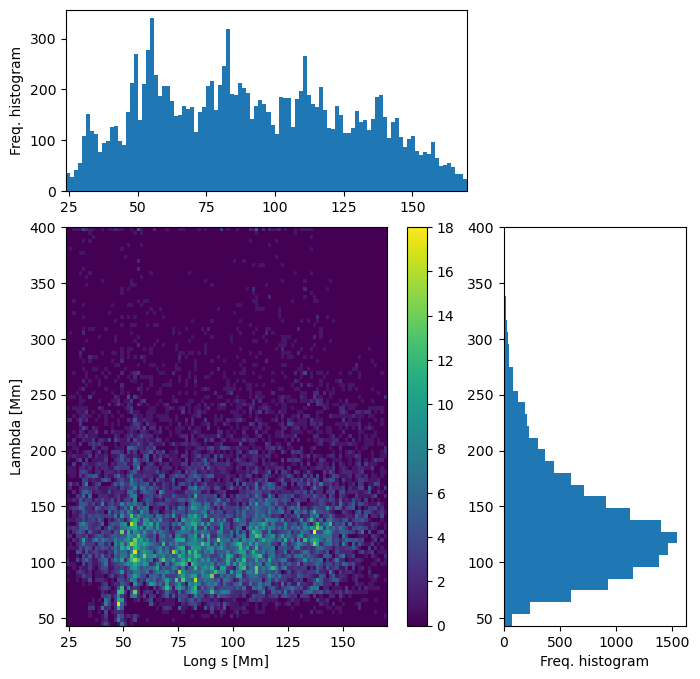

In [77]:
long_s_clean_filtered     = [long_s_clean[qwe] for qwe in filter_multi_clean_2]
lambda_n_s_clean_filtered = [lambda_n_s_clean[qwe] for qwe in filter_multi_clean_2]
long_s_clean_filtered     = np.array(long_r_clean_filtered)*rsun_to_Mm
lambda_n_s_clean_filtered = np.array(lambda_n_s_clean_filtered)*rsun_to_Mm*(-1)
rsun_to_Mm = 695.7

x = long_s_clean_filtered
#y = lambda_n_clean_filtered

y = lambda_n_s_clean_filtered
clipped_y = np.clip(y, 0, 400)
fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
    
#ax_main.scatter(x,y,marker='.')
ax_main.hist2d(x, clipped_y, bins=100)
hist_plot = ax_main.hist2d(x, clipped_y, bins=100)
cbar = fig.colorbar(hist_plot[3], ax=ax_main)
#cbar = plt.colorbar()
#cbar.ax.set_ylabel('Counts')
ax_main.set(xlabel='Long s [Mm]', ylabel="Lambda [Mm]")

ax_xDist.hist(x,bins=100,align='mid')
ax_xDist.set(ylabel='Freq. histogram')
#ax_xCumDist = ax_xDist.twinx()
#ax_xCumDist.hist(x,bins=100,cumulative=True,histtype='step',density=True,color='r',align='mid')
#ax_xCumDist.tick_params('y', colors='r')
#ax_xCumDist.set_ylabel('cumulative',color='r')

ax_yDist.hist(y,bins=100,orientation='horizontal',align='mid')
ax_yDist.set(xlabel='Freq. histogram')
#ax_yCumDist = ax_yDist.twiny()
#ax_yCumDist.hist(y,bins=100,cumulative=True,histtype='step',density=True,color='r',align='mid',orientation='horizontal')
#ax_yCumDist.tick_params('x', colors='r')
#ax_yCumDist.set_xlabel('cumulative',color='r')
plt.show()

In [ ]:
rsun_to_Mm                = 695.7
long_s_clean_filtered     = [long_s_clean[qwe] for qwe in filter_multi_clean_2]
lambda_n_s_clean_filtered = [lambda_n_s_clean[qwe] for qwe in filter_multi_clean_2]
long_s_clean_filtered     = np.array(long_s_clean_filtered)*rsun_to_Mm
lambda_n_s_clean_filtered = np.array(lambda_n_s_clean_filtered)*rsun_to_Mm*(-1)
p1_over_2p2 = 1- 1/(np.pi**2) * long_s_clean_filtered/lambda_n_s_clean_filtered + (2/np.pi**4 - 5/(32*np.pi**2)) * (long_s_clean_filtered/lambda_n_s_clean_filtered)**2

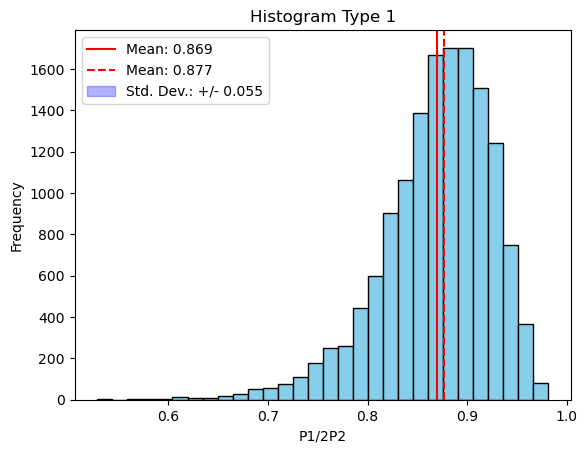

In [ ]:
#TYPE 1
cond1 = np.array(opclstat_clean)==2
cond2 = np.array(pearson_t_clean)>0.5
cond3 = np.array(r2n_clean)>0.85
cond4 = np.array(np.abs(footlat_clean)) < 40
filter_multi_clean_2=list(np.where(cond1 & cond2 & cond3 & cond4)[0])
#---
rsun_to_Mm                = 695.7
long_s_clean_filtered     = [long_s_clean[qwe] for qwe in filter_multi_clean_2]
lambda_n_s_clean_filtered = [lambda_n_s_clean[qwe] for qwe in filter_multi_clean_2]
long_s_clean_filtered     = np.array(long_s_clean_filtered)*rsun_to_Mm
lambda_n_s_clean_filtered = np.array(lambda_n_s_clean_filtered)*rsun_to_Mm*(-1)
p1_over_2p2 = 1- 1/(np.pi**2) * long_s_clean_filtered/lambda_n_s_clean_filtered + (2/np.pi**4 - 5/(32*np.pi**2)) * (long_s_clean_filtered/lambda_n_s_clean_filtered)**2

#---

plt.hist(p1_over_2p2, bins=30, color='skyblue', edgecolor='black')
mean_value   = np.mean(p1_over_2p2)
median_value = np.median(p1_over_2p2)
std_value    = np.std(p1_over_2p2)
plt.axvline(mean_value, color='r', linestyle='-', label=f'Mean: {mean_value:.3f}')
plt.axvline(median_value, color='r', linestyle='--', label=f'Mean: {median_value:.3f}')

plt.fill_between(
    [mean_value - std_value, mean_value + std_value],
    [0, 0],
    alpha=0.3,
    color='blue',
    label=f"Std. Dev.: +/- {std_value:.3f}"
)

#plt.xlim(-3, 3)
# Add labels and title
plt.xlabel('P1/2P2')
plt.ylabel('Frequency')
plt.title('Histogram Type 1')
# Show the plot
plt.legend()
plt.show()

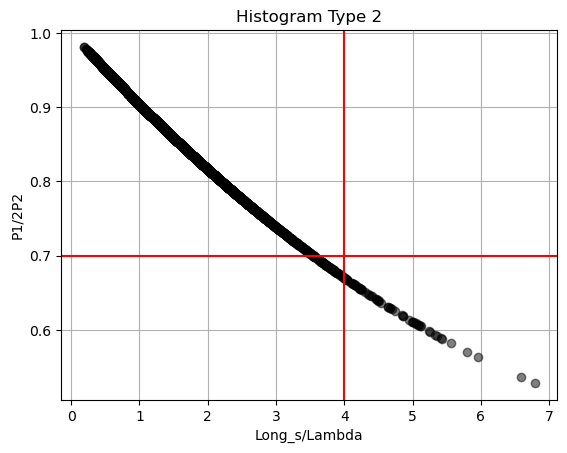

In [ ]:
x = long_s_clean_filtered/lambda_n_s_clean_filtered
y = p1_over_2p2

plt.plot(x, y, 'o', color='black', alpha=0.5)
# Add labels and title
plt.xlabel('Long_s/Lambda')
plt.ylabel('P1/2P2')
plt.title('Histogram Type 1')
plt.axvline(4, color='r', linestyle='-')
plt.axhline(0.7, color='r', linestyle='-')
plt.grid()
# Show the plot
#plt.legend()
plt.show()


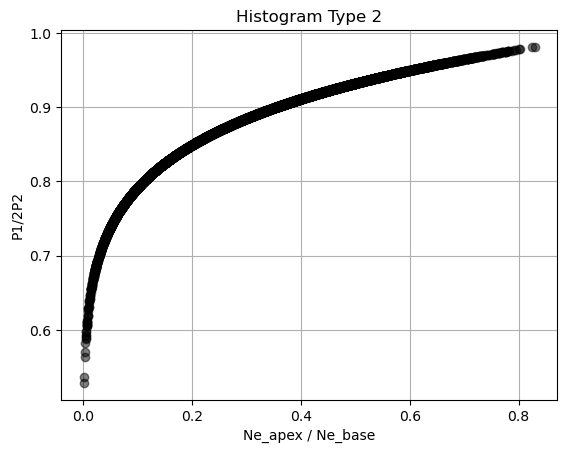

In [ ]:
#x = long_s_clean_filtered/lambda_n_s_clean_filtered
x = np.exp(long_s_clean_filtered*(-1)/lambda_n_s_clean_filtered)
y = p1_over_2p2

plt.plot(x, y, 'o', color='black', alpha=0.5)
# Add labels and title
plt.xlabel('Ne_apex / Ne_base')
plt.ylabel('P1/2P2')
plt.title('Histogram Type 1')
#plt.axvline(4, color='r', linestyle='-')
#plt.axhline(0.7, color='r', linestyle='-')
# Show the plot
plt.grid()
#plt.legend()
plt.show()

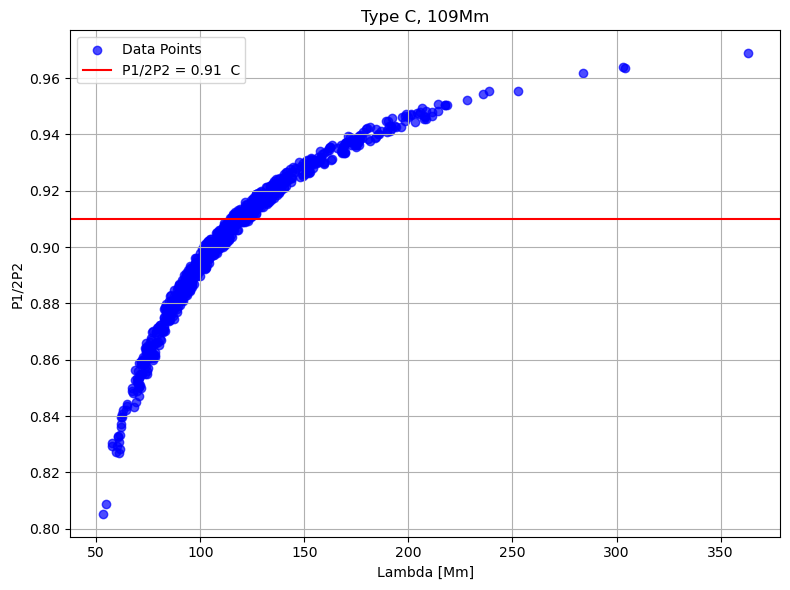

In [144]:
rsun_to_Mm                = 695.7

cond1 = np.array(opclstat_clean)==2
cond2 = np.array(pearson_t_clean)>0.5
cond3 = np.array(r2n_clean)>0.85
cond4 = np.array(np.abs(footlat_clean)) < 40
cond5 = np.array(long_s_clean) *rsun_to_Mm > 105
cond6 = np.array(long_s_clean) *rsun_to_Mm < 115
filter_multi_clean_long=list(np.where(cond1 & cond2 & cond3 & cond4 & cond5 & cond6)[0])
#---
long_s_clean_filtered     = [long_s_clean[qwe] for qwe in filter_multi_clean_long]
lambda_n_s_clean_filtered = [lambda_n_s_clean[qwe] for qwe in filter_multi_clean_long]
long_s_clean_filtered     = np.array(long_s_clean_filtered)*rsun_to_Mm
lambda_n_s_clean_filtered = np.array(lambda_n_s_clean_filtered)*rsun_to_Mm*(-1)
p1_over_2p2 = 1- 1/(np.pi**2) * long_s_clean_filtered/lambda_n_s_clean_filtered + (2/np.pi**4 - 5/(32*np.pi**2)) * (long_s_clean_filtered/lambda_n_s_clean_filtered)**2

#---
#second filter
plt.figure(figsize=(8,6))
plt.scatter(lambda_n_s_clean_filtered, p1_over_2p2, marker='o', color='b', alpha=0.7, label='Data Points')  # Customize the plot
plt.axhline(0.91, color='r', linestyle='-', label='P1/2P2 = 0.91  C' )
#plt.ylim(-1, 1)
# Add labels and title
plt.xlabel('Lambda [Mm]')
plt.ylabel('P1/2P2')
plt.title('Type C, 109Mm')
# Add a legend
plt.legend()
# Show the plot
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()  # Adjust spacing for labels
plt.show()

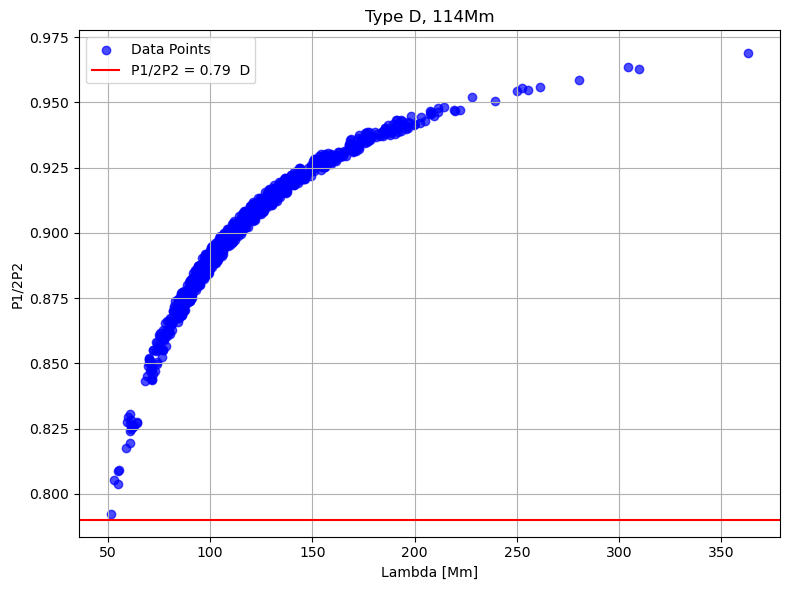

In [147]:
rsun_to_Mm                = 695.7

cond1 = np.array(opclstat_clean)==2
cond2 = np.array(pearson_t_clean)>0.5
cond3 = np.array(r2n_clean)>0.85
cond4 = np.array(np.abs(footlat_clean)) < 40
cond5 = np.array(long_s_clean) *rsun_to_Mm > 110
cond6 = np.array(long_s_clean) *rsun_to_Mm < 120
filter_multi_clean_long=list(np.where(cond1 & cond2 & cond3 & cond4 & cond5 & cond6)[0])
#---
long_s_clean_filtered     = [long_s_clean[qwe] for qwe in filter_multi_clean_long]
lambda_n_s_clean_filtered = [lambda_n_s_clean[qwe] for qwe in filter_multi_clean_long]
long_s_clean_filtered     = np.array(long_s_clean_filtered)*rsun_to_Mm
lambda_n_s_clean_filtered = np.array(lambda_n_s_clean_filtered)*rsun_to_Mm*(-1)
p1_over_2p2 = 1- 1/(np.pi**2) * long_s_clean_filtered/lambda_n_s_clean_filtered + (2/np.pi**4 - 5/(32*np.pi**2)) * (long_s_clean_filtered/lambda_n_s_clean_filtered)**2

#---
#second filter
plt.figure(figsize=(8,6))
plt.scatter(lambda_n_s_clean_filtered, p1_over_2p2, marker='o', color='b', alpha=0.7, label='Data Points')  # Customize the plot
plt.axhline(0.79, color='r', linestyle='-', label='P1/2P2 = 0.79  D' )
#plt.ylim(-1, 1)
# Add labels and title
plt.xlabel('Lambda [Mm]')
plt.ylabel('P1/2P2')
plt.title('Type D, 114Mm')
# Add a legend
plt.legend()
# Show the plot
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()  # Adjust spacing for labels
plt.show()

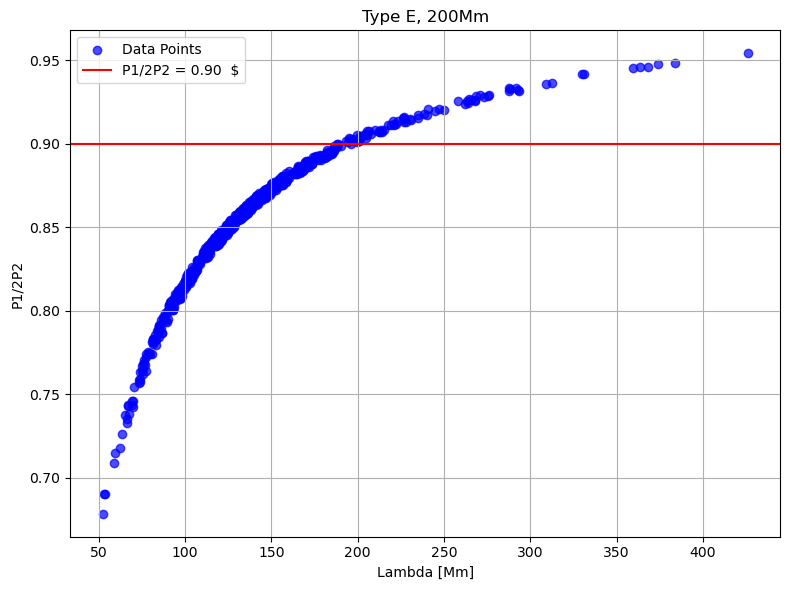

In [148]:
rsun_to_Mm                = 695.7

cond1 = np.array(opclstat_clean)==2
cond2 = np.array(pearson_t_clean)>0.5
cond3 = np.array(r2n_clean)>0.85
cond4 = np.array(np.abs(footlat_clean)) < 40
cond5 = np.array(long_s_clean) *rsun_to_Mm > 195
cond6 = np.array(long_s_clean) *rsun_to_Mm < 205
filter_multi_clean_long=list(np.where(cond1 & cond2 & cond3 & cond4 & cond5 & cond6)[0])
#---
long_s_clean_filtered     = [long_s_clean[qwe] for qwe in filter_multi_clean_long]
lambda_n_s_clean_filtered = [lambda_n_s_clean[qwe] for qwe in filter_multi_clean_long]
long_s_clean_filtered     = np.array(long_s_clean_filtered)*rsun_to_Mm
lambda_n_s_clean_filtered = np.array(lambda_n_s_clean_filtered)*rsun_to_Mm*(-1)
p1_over_2p2 = 1- 1/(np.pi**2) * long_s_clean_filtered/lambda_n_s_clean_filtered + (2/np.pi**4 - 5/(32*np.pi**2)) * (long_s_clean_filtered/lambda_n_s_clean_filtered)**2

#---
#second filter
plt.figure(figsize=(8,6))
plt.scatter(lambda_n_s_clean_filtered, p1_over_2p2, marker='o', color='b', alpha=0.7, label='Data Points')  # Customize the plot
plt.axhline(0.90, color='r', linestyle='-', label='P1/2P2 = 0.90  $' )
#plt.ylim(-1, 1)
# Add labels and title
plt.xlabel('Lambda [Mm]')
plt.ylabel('P1/2P2')
plt.title('Type E, 200Mm')
# Add a legend
plt.legend()
# Show the plot
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()  # Adjust spacing for labels
plt.show()

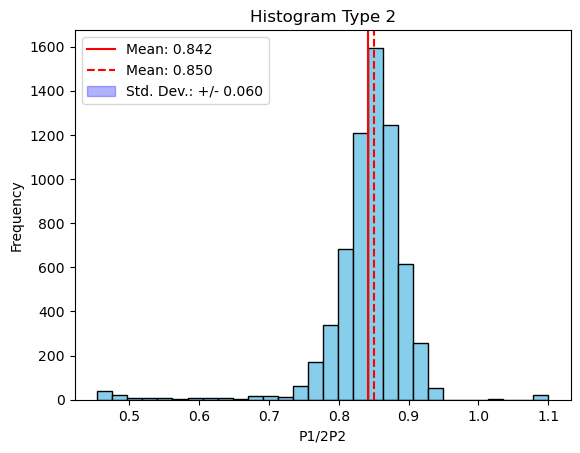

In [ ]:
#TYPE 2
cond1 = np.array(opclstat_clean)==1
cond2 = np.array(pearson_t_clean)>0.5
cond3 = np.array(r2n_clean)>0.85
cond4 = np.array(np.abs(footlat_clean)) > 40
filter_multi_clean_1=list(np.where(cond1 & cond2 & cond3 & cond4)[0])

#---
rsun_to_Mm                = 695.7
long_s_clean_filtered     = [long_s_clean[qwe] for qwe in filter_multi_clean_1]
lambda_n_s_clean_filtered = [lambda_n_s_clean[qwe] for qwe in filter_multi_clean_1]
long_s_clean_filtered     = np.array(long_s_clean_filtered)*rsun_to_Mm
lambda_n_s_clean_filtered = np.array(lambda_n_s_clean_filtered)*rsun_to_Mm*(-1)
p1_over_2p2 = 1- 1/(np.pi**2) * long_s_clean_filtered/lambda_n_s_clean_filtered + (2/np.pi**4 - 5/(32*np.pi**2)) * (long_s_clean_filtered/lambda_n_s_clean_filtered)**2

#---

clipped_p1_over_2p2 = np.clip(p1_over_2p2, 0.4, 1.1)

plt.hist(clipped_p1_over_2p2, bins=30, color='skyblue', edgecolor='black')
mean_value   = np.mean(clipped_p1_over_2p2)
median_value = np.median(clipped_p1_over_2p2)
std_value    = np.std(clipped_p1_over_2p2)
plt.axvline(mean_value, color='r', linestyle='-', label=f'Mean: {mean_value:.3f}')
plt.axvline(median_value, color='r', linestyle='--', label=f'Mean: {median_value:.3f}')

plt.fill_between(
    [mean_value - std_value, mean_value + std_value],
    [0, 0],
    alpha=0.3,
    color='blue',
    label=f"Std. Dev.: +/- {std_value:.3f}"
)


# Add labels and title
plt.xlabel('P1/2P2')
plt.ylabel('Frequency')
plt.title('Histogram Type 2')
# Show the plot
plt.legend()
plt.show()

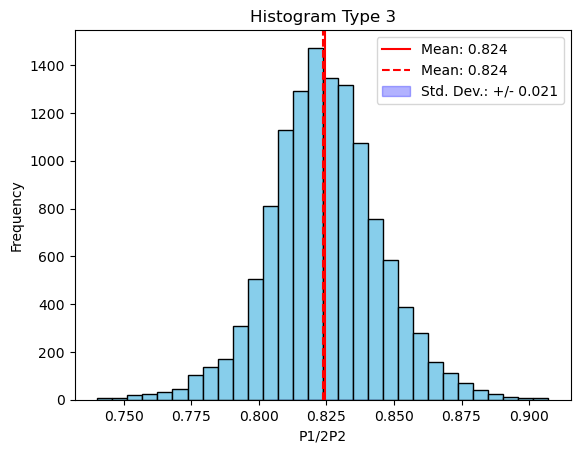

In [ ]:
#TYPE 3
cond1 = np.array(opclstat_clean)==0
cond2 = np.array(pearson_t_clean)>0.5
cond3 = np.array(r2n_clean)>0.85
cond4 = np.array(np.abs(footlat_clean)) > 70
filter_multi_clean_1=list(np.where(cond1 & cond2 & cond3 & cond4)[0])

#---
rsun_to_Mm                = 695.7
long_s_clean_filtered     = [long_s_clean[qwe] for qwe in filter_multi_clean_0]
lambda_n_s_clean_filtered = [lambda_n_s_clean[qwe] for qwe in filter_multi_clean_0]
long_s_clean_filtered     = np.array(long_s_clean_filtered)*rsun_to_Mm
lambda_n_s_clean_filtered = np.array(lambda_n_s_clean_filtered)*rsun_to_Mm*(-1)
p1_over_2p2 = 1- 1/(np.pi**2) * long_s_clean_filtered/lambda_n_s_clean_filtered + (2/np.pi**4 - 5/(32*np.pi**2)) * (long_s_clean_filtered/lambda_n_s_clean_filtered)**2

#---

clipped_p1_over_2p2 = p1_over_2p2#np.clip(p1_over_2p2, 0.4, 1.1)

plt.hist(clipped_p1_over_2p2, bins=30, color='skyblue', edgecolor='black')
mean_value   = np.mean(clipped_p1_over_2p2)
median_value = np.median(clipped_p1_over_2p2)
std_value    = np.std(clipped_p1_over_2p2)
plt.axvline(mean_value, color='r', linestyle='-', label=f'Mean: {mean_value:.3f}')
plt.axvline(median_value, color='r', linestyle='--', label=f'Mean: {median_value:.3f}')

plt.fill_between(
    [mean_value - std_value, mean_value + std_value],
    [0, 0],
    alpha=0.3,
    color='blue',
    label=f"Std. Dev.: +/- {std_value:.3f}"
)


# Add labels and title
plt.xlabel('P1/2P2')
plt.ylabel('Frequency')
plt.title('Histogram Type 3')
# Show the plot
plt.legend()
plt.show()

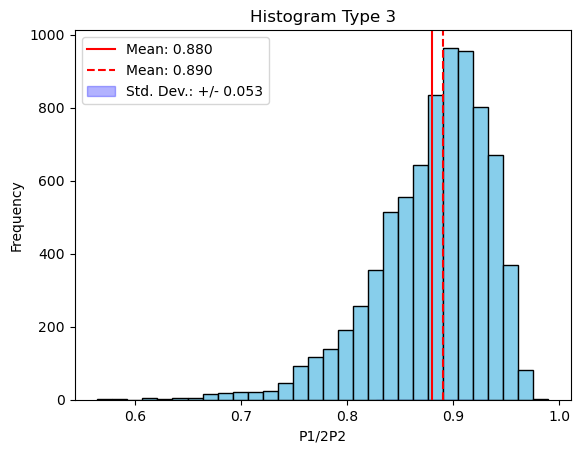

In [ ]:
#TYPE 3
cond1 = np.array(opclstat_clean)==2
cond2 = np.array(pearson_t_clean)<-0.5
cond3 = np.array(r2n_clean)>0.85
cond4 = np.array(np.abs(footlat_clean)) < 40
filter_multi_clean_0=list(np.where(cond1 & cond2 & cond3 & cond4)[0])

#---
rsun_to_Mm                = 695.7
long_s_clean_filtered     = [long_s_clean[qwe] for qwe in filter_multi_clean_0]
lambda_n_s_clean_filtered = [lambda_n_s_clean[qwe] for qwe in filter_multi_clean_0]
long_s_clean_filtered     = np.array(long_s_clean_filtered)*rsun_to_Mm
lambda_n_s_clean_filtered = np.array(lambda_n_s_clean_filtered)*rsun_to_Mm*(-1)
p1_over_2p2 = 1- 1/(np.pi**2) * long_s_clean_filtered/lambda_n_s_clean_filtered + (2/np.pi**4 - 5/(32*np.pi**2)) * (long_s_clean_filtered/lambda_n_s_clean_filtered)**2

#---

clipped_p1_over_2p2 = p1_over_2p2#np.clip(p1_over_2p2, 0.4, 1.1)

plt.hist(clipped_p1_over_2p2, bins=30, color='skyblue', edgecolor='black')
mean_value   = np.mean(clipped_p1_over_2p2)
median_value = np.median(clipped_p1_over_2p2)
std_value    = np.std(clipped_p1_over_2p2)
plt.axvline(mean_value, color='r', linestyle='-', label=f'Mean: {mean_value:.3f}')
plt.axvline(median_value, color='r', linestyle='--', label=f'Mean: {median_value:.3f}')

plt.fill_between(
    [mean_value - std_value, mean_value + std_value],
    [0, 0],
    alpha=0.3,
    color='blue',
    label=f"Std. Dev.: +/- {std_value:.3f}"
)


# Add labels and title
plt.xlabel('P1/2P2')
plt.ylabel('Frequency')
plt.title('Histogram Type 3')
# Show the plot
plt.legend()
plt.show()

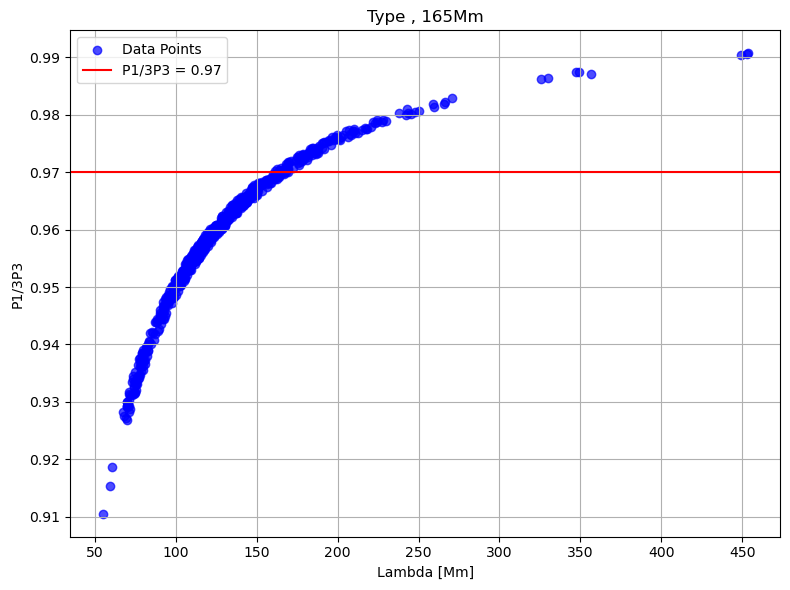

In [ ]:
#Duckenfield1 2019
rsun_to_Mm                = 695.7
cond1 = np.array(opclstat_clean)==2
cond2 = np.array(pearson_t_clean)>0.5
cond3 = np.array(r2n_clean)>0.85
cond4 = np.array(np.abs(footlat_clean)) < 40
cond5 = np.array(long_s_clean) *rsun_to_Mm > 160
cond6 = np.array(long_s_clean) *rsun_to_Mm < 170
filter_multi_clean_long=list(np.where(cond1 & cond2 & cond3 & cond4 & cond5 & cond6)[0])
#---
long_s_clean_filtered     = [long_s_clean[qwe] for qwe in filter_multi_clean_long]
lambda_n_s_clean_filtered = [lambda_n_s_clean[qwe] for qwe in filter_multi_clean_long]
long_s_clean_filtered     = np.array(long_s_clean_filtered)*rsun_to_Mm
lambda_n_s_clean_filtered = np.array(lambda_n_s_clean_filtered)*rsun_to_Mm*(-1)
#p1_over_2p2 = 1- 1/(np.pi**2) * long_s_clean_filtered/lambda_n_s_clean_filtered + (2/np.pi**4 - 5/(32*np.pi**2)) * (long_s_clean_filtered/lambda_n_s_clean_filtered)**2
#p1_over_3p3 = (1+lambda_n_s_clean_filtered/(35*np.pi**2*long_s_clean_filtered))/(1+lambda_n_s_clean_filtered/(3*np.pi**2*long_s_clean_filtered))
p1_over_3p3 = (1+long_s_clean_filtered/(35*np.pi**2*long_s_clean_filtered))/(1+long_s_clean_filtered/(3*np.pi**2*lambda_n_s_clean_filtered))
#---
#second filter
plt.figure(figsize=(8,6))
plt.scatter(lambda_n_s_clean_filtered, p1_over_3p3, marker='o', color='b', alpha=0.7, label='Data Points')  # Customize the plot
plt.axhline(0.97, color='r', linestyle='-', label='P1/3P3 = 0.97' )
#plt.ylim(-1, 1)
# Add labels and title
plt.xlabel('Lambda [Mm]')
plt.ylabel('P1/3P3')
plt.title('Type , 165Mm')
# Add a legend
plt.legend()
# Show the plot
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()  # Adjust spacing for labels
plt.show()